In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


In [2]:

url = "https://raw.githubusercontent.com/Promptgiga-edge/Sample-Data-CSV/main/Medical_insurance.csv"

df = pd.read_csv(url)

In [3]:
#df2 = pd.read_csv('medical_insurance_dataset.csv')
#headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
#df2.columns = headers
#df2.replace('?', np.nan, inplace = True)

#df.head(10)

#df2.info()

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print('The shape of the dataset is ', df.shape)
print('The size of the dataset is ', df.size)
print('The datatype of the dataset is ', df.dtypes)
print('The information about data of the dataset is ', df.info())



The shape of the dataset is  (2772, 7)
The size of the dataset is  19404
The datatype of the dataset is  age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
The information about data of the dataset is  None


In [6]:
print('The more information about data of the dataset is ', df.describe())

The more information about data of the dataset is                 age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
print('The information about null data of the dataset is ', df.isna().count())

The information about null data of the dataset is  age         2772
sex         2772
bmi         2772
children    2772
smoker      2772
region      2772
charges     2772
dtype: int64


In [8]:
df.replace('?', np.nan, inplace=True)

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age     sex     bmi  children smoker     region   charges
0   19  female  27.900         0    yes  southwest  16884.92
1   18    male  33.770         1     no  southeast   1725.55
2   28    male  33.000         3     no  southeast   4449.46
3   33    male  22.705         0     no  northwest  21984.47
4   32    male  28.880         0     no  northwest   3866.86


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

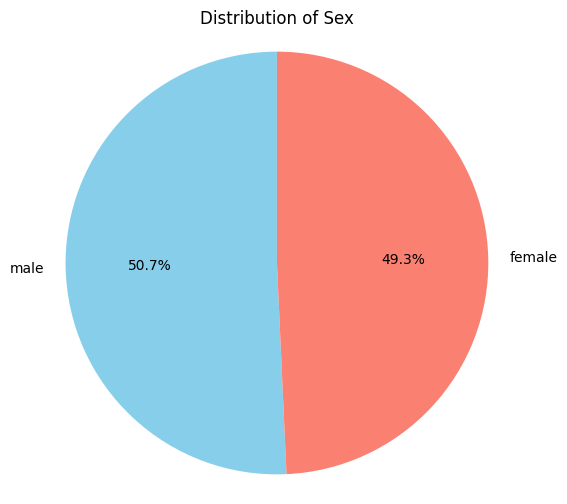

In [11]:
data = df['sex'].value_counts()
data

plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct="%1.1f%%", startangle=90, colors=["skyblue", "salmon"])
plt.title("Distribution of Sex")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

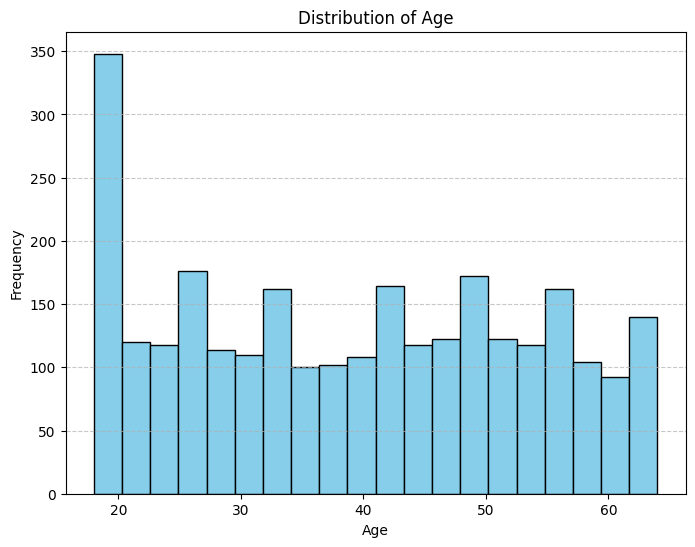

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df["age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

(0.0, 66902.85800000001)

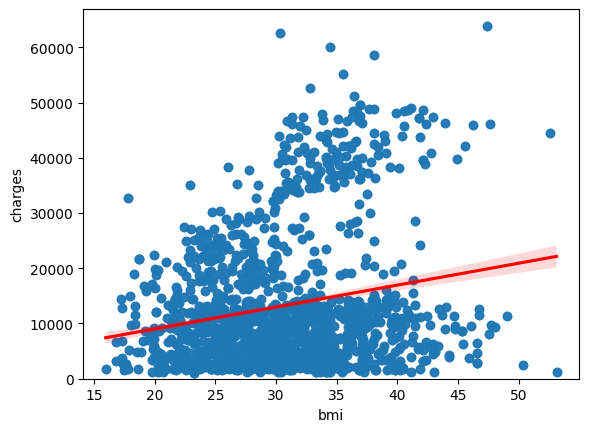

In [13]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.85800000001)

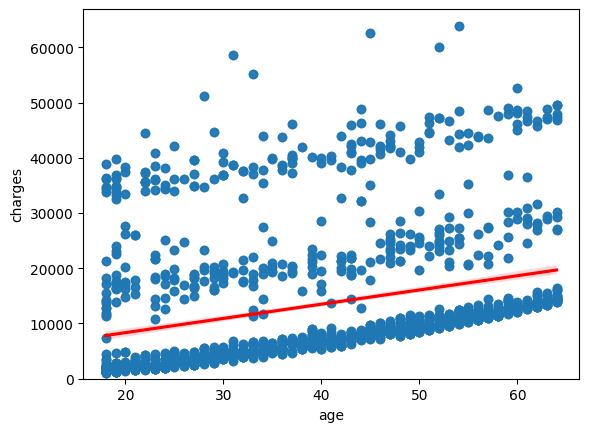

In [14]:
sns.regplot(x="age", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='sex', ylabel='bmi'>

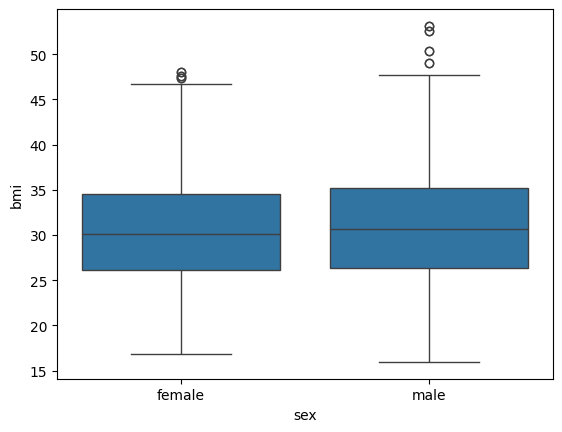

In [15]:
sns.boxplot(x="sex", y="bmi", data=df)

<Axes: xlabel='smoker', ylabel='charges'>

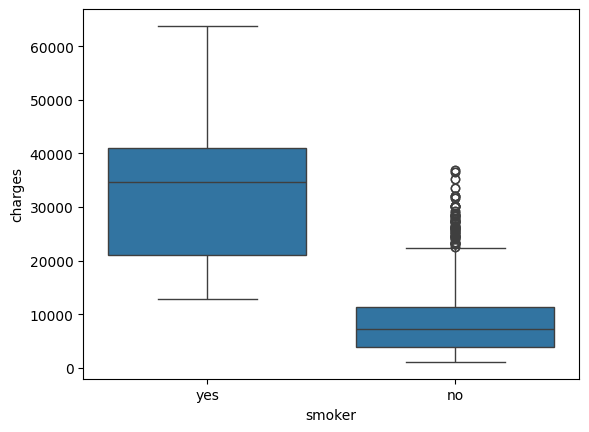

In [16]:
sns.boxplot(x="smoker", y="charges", data=df)

In [17]:
df['smoker'] = [0 if x == 'no'
                else 1
                for x in df['smoker']]
df['sex'] = [1 if x == "female"
                else 2
                for x in df['sex']]
df['region'] = [1 if x == 'northwest'
                else 2 if x == 'northeast'
                else 3 if x == 'southwest'
                else 4 
                for x in df['region']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


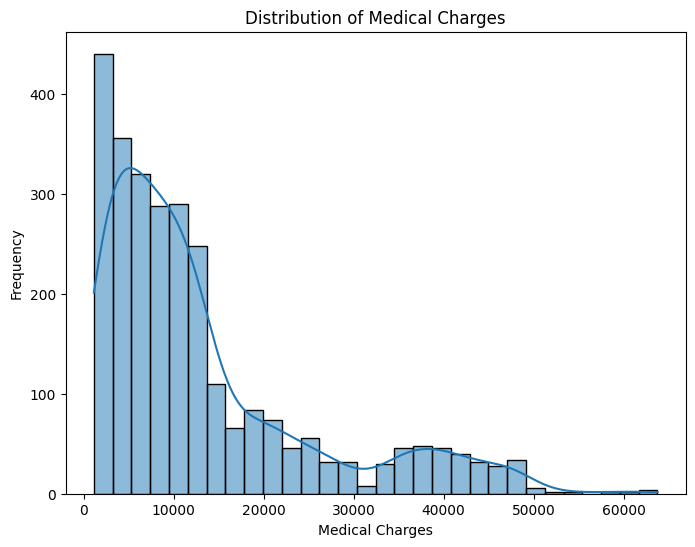

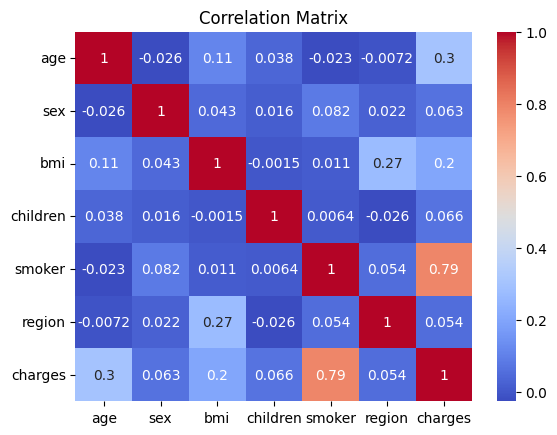

In [19]:


# Visualize the distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(df["charges"], bins=30, kde=True)
plt.xlabel("Medical Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Charges")
plt.show()

# Calculate correlations between numerical features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Assume 'age', 'bmi', and 'smoker' as features (you can choose others)
X = df[["age", "bmi", "smoker"]]
y = df["charges"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 40752861.04


In [21]:
print(df.corr())

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026046  0.113048  0.037574 -0.023286 -0.007167  0.298624
sex      -0.026046  1.000000  0.042924  0.016020  0.082326  0.022213  0.062837
bmi       0.113048  0.042924  1.000000 -0.001492  0.011489  0.271119  0.199846
children  0.037574  0.016020 -0.001492  1.000000  0.006362 -0.025717  0.066442
smoker   -0.023286  0.082326  0.011489  0.006362  1.000000  0.054077  0.788783
region   -0.007167  0.022213  0.271119 -0.025717  0.054077  1.000000  0.054058
charges   0.298624  0.062837  0.199846  0.066442  0.788783  0.054058  1.000000


In [22]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Evaluate the Ridge model
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Mean Squared Error: {mse_ridge:.2f}")


Ridge Mean Squared Error: 40763512.95


<h4>Task 4 : Model Development
<h5>Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R^2 score of this model.

In [23]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.

In [24]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "sex", "bmi", "children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [25]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452516193542143


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [27]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [28]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608148
